# Classwork 10: Classification with pyspark 

# Initialize and load data

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz
!tar xf spark-2.4.8-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
#All imports
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.8-bin-hadoop2.7"

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
import findspark
findspark.init()# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
df = pd.read_csv('ZipData_2020.csv',sep=';')
df.head()


,Numero,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
0,seis,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,cinco,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,cuatro,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,siete,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,tres,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [ ]:
df['Numero'].unique()

array(['seis', 'cinco', 'cuatro', 'siete', 'tres', 'uno', 'cero', 'ocho',
       'dos', 'nueve'], dtype=object)

In [ ]:
# antes de cargar a df_spark, modificaremos la entrada de números para que sea un entero que pueda interpretar el clustering

df['Numero'] = df['Numero'].replace({'cero' : 0, 'uno' : 1,'dos' : 2, 'tres' : 3, 'cuatro' : 4, 'cinco' : 5, 'seis' : 6,  'siete' : 7,  'ocho' : 8,  'nueve' : 9})

In [ ]:
df=df.dropna()
df.shape

(9298, 257)

In [ ]:
df.dtypes

Numero      int64
V2        float64
V3        float64
V4        float64
V5        float64
           ...   
V253      float64
V254      float64
V255      float64
V256      float64
V257      float64
Length: 257, dtype: object

In [ ]:
df_spark = spark.createDataFrame(df)
df_spark.printSchema() # print detail schema of data

root
 |-- Numero: long (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nullable = true)
 |-- V29: double (null

In [ ]:
df_spark.show(10)# show top 10 rows


+------+----+----+----+------+------+------+------+------+------+------+------+------+------+-----+------+----+----+----+----+------+------+-----+------+------+------+------+------+-----+------+------+-----+----+----+----+----+------+------+-----+------+------+------+------+------+------+----+------+-----+------+----+----+----+------+------+------+------+------+-----+------+------+------+------+------+-----+----+----+----+------+------+------+------+------+-----+------+------+------+------+------+------+------+----+----+----+------+------+-----+------+------+------+------+------+------+------+------+----+------+----+----+------+-----+------+------+------+------+-----+-----+------+------+------+------+-----+-----+------+----+------+------+------+------+------+------+-----+------+------+-----+------+------+------+----+------+----+----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-----+--

## EDA

In [ ]:
# print rows and columns in spark like shape in pandas 
print((df_spark.count(), len(df_spark.columns)))

(9298, 257)


In [ ]:
# Calculate statistical varables for columns 
df_spark.describe().toPandas().transpose()

/content/spark-2.4.8-bin-hadoop2.7/python/pyspark/sql/dataframe.py:2195: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series


,0,1,2,3,4
summary,count,mean,stddev,min,max
Numero,9298,3.8920197892019788,3.001085957914094,0,9
V2,9298,-0.99645579694558,0.04981219362793142,-1.0,0.638
V3,9298,-0.9804442890944286,0.15520667281950365,-1.0,1.0
V4,9298,-0.9507168208216821,0.24451105530731612,-1.0,1.0
...,...,...,...,...,...
V253,9298,-0.8334556893955685,0.42293096618238757,-1.0,1.0
V254,9298,-0.920130458163045,0.3042018637009437,-1.0,1.0
V255,9298,-0.9580984082598407,0.22702954717518925,-1.0,1.0
V256,9298,-0.9803189933318991,0.15321552072378733,-1.0,1.0


In [ ]:
print(df_spark.dtypes)

[('Numero', 'bigint'), ('V2', 'double'), ('V3', 'double'), ('V4', 'double'), ('V5', 'double'), ('V6', 'double'), ('V7', 'double'), ('V8', 'double'), ('V9', 'double'), ('V10', 'double'), ('V11', 'double'), ('V12', 'double'), ('V13', 'double'), ('V14', 'double'), ('V15', 'double'), ('V16', 'double'), ('V17', 'double'), ('V18', 'double'), ('V19', 'double'), ('V20', 'double'), ('V21', 'double'), ('V22', 'double'), ('V23', 'double'), ('V24', 'double'), ('V25', 'double'), ('V26', 'double'), ('V27', 'double'), ('V28', 'double'), ('V29', 'double'), ('V30', 'double'), ('V31', 'double'), ('V32', 'double'), ('V33', 'double'), ('V34', 'double'), ('V35', 'double'), ('V36', 'double'), ('V37', 'double'), ('V38', 'double'), ('V39', 'double'), ('V40', 'double'), ('V41', 'double'), ('V42', 'double'), ('V43', 'double'), ('V44', 'double'), ('V45', 'double'), ('V46', 'double'), ('V47', 'double'), ('V48', 'double'), ('V49', 'double'), ('V50', 'double'), ('V51', 'double'), ('V52', 'double'), ('V53', 'double'

# Processing

## Compute correlation matrix to find which pixels are more definitive. TODO

In [ ]:
# Correlation matrix between the input features and Number
import six
for i in df_spark.columns:
    if not( isinstance(df_spark.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Numero for ", i, df_spark.stat.corr('Numero',i))

Correlation to Numero for  Numero 1.0
Correlation to Numero for  V2 0.0272161296316061
Correlation to Numero for  V3 0.0554368929666687
Correlation to Numero for  V4 0.07226138572674856
Correlation to Numero for  V5 0.07461866975747714
Correlation to Numero for  V6 0.060046999075962004
Correlation to Numero for  V7 0.031096385679508395
Correlation to Numero for  V8 -0.042996668486881086
Correlation to Numero for  V9 -0.1420342109800146
Correlation to Numero for  V10 0.10801182000213566
Correlation to Numero for  V11 0.37615056925977175
Correlation to Numero for  V12 0.40406217198203775
Correlation to Numero for  V13 0.32745793296884396
Correlation to Numero for  V14 0.23567713456794928
Correlation to Numero for  V15 0.16718177881420937
Correlation to Numero for  V16 0.10192444656321341
Correlation to Numero for  V17 0.04790772440593295
Correlation to Numero for  V18 0.04920994772384704
Correlation to Numero for  V19 0.0748965251564197
Correlation to Numero for  V20 0.0820768606266642
C

## Is this a class balanced problem? Justify your answer.

In [ ]:
df_spark.cube('Numero').count().show()

+------+-----+
|Numero|count|
+------+-----+
|     5|  716|
|     8|  708|
|  null| 9298|
|     3|  824|
|     2|  929|
|     0| 1553|
|     7|  792|
|     6|  834|
|     9|  821|
|     1| 1269|
|     4|  852|
+------+-----+



The classes are not entirely balanced. For example, the 0 class has 700, while 5 has 283. The difference between the heaviest and lightest classes is too large to be considered entirely balanced.

## Use Decision Tree Algorithm  to generate predictive classification models for dataset ZipData 2020 (file ZipData_2020.csv. ) using 80 % of data for training and 20% for testing.

In [ ]:
pixels = df_spark.drop('Numero').columns

In [ ]:
# Spark support only two columns during training one for features and second one is labels
# Vector Assembler is used to assemble all the features used for training 
# Class in the label where to train a Classification model for estimating the 
# bill is counterfeit or not
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = pixels, outputCol = 'features')
Counterfeit_df = vectorAssembler.transform(df_spark)
Counterfeit_df= Counterfeit_df.select(['features', 'Numero'])
Counterfeit_df.show(3)

+--------------------+------+
|            features|Numero|
+--------------------+------+
|[-1.0,-1.0,-1.0,-...|     6|
|[-1.0,-1.0,-1.0,-...|     5|
|[-1.0,-1.0,-1.0,-...|     4|
+--------------------+------+
only showing top 3 rows



In [ ]:
# Splitting data into training and testing 80% training and 20% testing
weights = [.8, .2]
#seed = 42 # seed=0L
rawTrainData, rawValidationData = Counterfeit_df.randomSplit(weights)

In [ ]:
rawValidationData.show(10)

+--------------------+------+
|            features|Numero|
+--------------------+------+
|[-1.0,-1.0,-1.0,-...|     2|
|[-1.0,-1.0,-1.0,-...|     2|
|[-1.0,-1.0,-1.0,-...|     2|
|[-1.0,-1.0,-1.0,-...|     2|
|[-1.0,-1.0,-1.0,-...|     2|
|[-1.0,-1.0,-1.0,-...|     2|
|[-1.0,-1.0,-1.0,-...|     2|
|[-1.0,-1.0,-1.0,-...|     7|
|[-1.0,-1.0,-1.0,-...|     3|
|[-1.0,-1.0,-1.0,-...|     0|
+--------------------+------+
only showing top 10 rows



In [ ]:
# Training and testing the decision tree model 
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol='Numero')
dt_model = dt.fit(rawTrainData)
dt_predictions = dt_model.transform(rawValidationData)
dt_predictions.select("prediction","Numero","features").show(5)

+----------+------+--------------------+
|prediction|Numero|            features|
+----------+------+--------------------+
|       4.0|     2|[-1.0,-1.0,-1.0,-...|
|       2.0|     2|[-1.0,-1.0,-1.0,-...|
|       4.0|     2|[-1.0,-1.0,-1.0,-...|
|       2.0|     2|[-1.0,-1.0,-1.0,-...|
|       2.0|     2|[-1.0,-1.0,-1.0,-...|
+----------+------+--------------------+
only showing top 5 rows



## Generate a confusion table and calculate accuracy.

In [ ]:
#Using sklearn for a classification report
dt_predictions_sampled = dt_predictions.sample(0.8)
y_true = dt_predictions_sampled.select(['Numero']).collect()
y_pred = dt_predictions_sampled.select(['prediction']).collect()

#Using Scikit Learn to evaluate
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_true, y_pred))
#print(classification_report(y_true, y_pred))

[[232   0   1   0   1   0   7   1  14   1]
 [  0 179   0   0   4   0   3   1   0  12]
 [ 14   1 104   1   7   2   8  10  10   5]
 [  6   0   2  70   3  10   1   2  15  15]
 [  0   2   4   0 100   1   2   1   2  21]
 [ 14   1   3   4   1  72   2   1   4   8]
 [  6   0   5   0   3   2 113   0   8   3]
 [  0   1   6   0   4   0   0 113   0  24]
 [  1   2   2   4   2   1  10   0  86   7]
 [  0   0   0   0   1   0   0   3   4 137]]


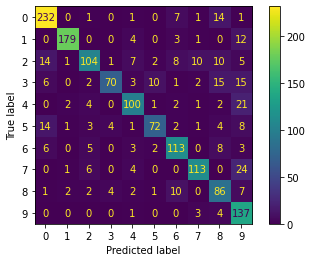

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


## Can you compute recall and sensitivity?

In [ ]:
#To find Area under the curve we will use the binary classificator
#from pyspark.ml.evaluation import BinaryClassificationEvaluator
#areaUnderROC_Test = BinaryClassificationEvaluator(metricName = 'areaUnderROC', labelCol="Numero")
#ART = areaUnderROC_Test.evaluate(dt_predictions)
#print("Area Under Curve test",ART)

# Testing the trained logistic regression model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="Numero", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(dt_predictions,{evaluator.metricName: "accuracy"})

print("Test Error = %g " % (1.0 - accuracy))
print("Test Accuracy = %g " % ( accuracy))
print("Test F1 = ",evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"}))
print("Test Weighted Precision = ",evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"}))
print("Test Weighted Recall = ",evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"}))
print("Test Weighted Sensitivity = ",evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"}))

Test Error = 0.214434 
Test Accuracy = 0.785566 
Test F1 =  0.7863517659053675
Test Weighted Precision =  0.8053877979056198
Test Weighted Recall =  0.7855659397715472
